# Segmentation d'images 2D


### Monter le réperdoire de google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r drive/MyDrive/ColabNotebooks/progTP4/* .

Mounted at /content/drive


### Aller dans le bon répertoire et exécuter le code.



In [2]:
ls

drive/  prog/  sample_data/


In [4]:
cd prog/src/

/content/prog/src


In [5]:
ls

fig1.png   manage/  train.ipynb  UNet_acc_valid_79.pt
losses.py  models/  train.py     utils/


In [6]:
!python3 train.py --help

usage: 
 python3 train.py [model] [dataset] [hyper_parameters]
 python3 train.py --model UNet [hyper_parameters]
 python3 train.py --model UNet --predict

This program allows to train different models of classification on different
datasets. Be aware that when using UNet model there is no need to provide a
dataset since UNet model only train on acdc dataset.

options:
  -h, --help            show this help message and exit
  --model {CnnVanilla,VggNet,AlexNet,ResNet,yourUNet,yourSegNet,UNet}
  --dataset {cifar10,svhn}
  --loss LOSS
  --batch_size BATCH_SIZE
                        The size of the training batch
  --optimizer {Adam,SGD}
                        The optimizer to use for training the model
  --num-epochs NUM_EPOCHS
                        The number of epochs
  --validation VALIDATION
                        Percentage of training data to use for validation
  --lr LR               Learning rate
  --data_aug            Data augmentation
  --predict PREDICT     Name of the f

### Entraînement d'un yourUNet

In [7]:
!python3 train.py --model=yourUNet --num-epochs=50 --batch_size=32 --lr=0.01 --data_aug

Data augmentation activated!
Training YourUNet on acdc for 50 epochs
Epoch: 1 of 50
100% 40/40 [00:21<00:00,  1.83it/s, Train loss=1.68, train_acc=0.048]
Validation loss 1.596
Validation accuracy 0.056
Epoch: 2 of 50
100% 40/40 [00:19<00:00,  2.01it/s, Train loss=1.47, train_acc=0.0901]
Validation loss 1.502
Validation accuracy 0.080
Epoch: 3 of 50
100% 40/40 [00:19<00:00,  2.01it/s, Train loss=1.33, train_acc=0.197]
Validation loss 1.608
Validation accuracy 0.078
Epoch: 4 of 50
100% 40/40 [00:19<00:00,  2.01it/s, Train loss=1.08, train_acc=0.349]
Validation loss 1.649
Validation accuracy 0.101
Epoch: 5 of 50
100% 40/40 [00:19<00:00,  2.01it/s, Train loss=0.835, train_acc=0.5]
Validation loss 1.921
Validation accuracy 0.036
Epoch: 6 of 50
100% 40/40 [00:19<00:00,  2.01it/s, Train loss=0.642, train_acc=0.615]
Validation loss 0.654
Validation accuracy 0.604
Epoch: 7 of 50
100% 40/40 [00:19<00:00,  2.01it/s, Train loss=0.568, train_acc=0.66]
Validation loss 1.509
Validation accuracy 0.320

In [3]:
# Le fichier UNet_acc_valid_79.pt contient les poids d'un UNet ayant une justesse de 79%.
!python3 train.py --model yourUNet --predict ./YourUNet_85.pt --data_aug

/home/amadou/.local/lib/python3.12/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Data augmentation activated!
Files already downloaded and verified
Files already downloaded and verified
/home/amadou/Downloads/H2025/Reseaux de neurones/TP4_1/tp4-ift-780/progTP4/prog/src/manage/CNNTrainTestManager.py:51: RuntimeWarning: CUDA is not available. Suppress this warning by passing use_cuda=False to CNNTrainTestManager().
  warnings.warn("CUDA is not available. Suppress this warning by passing "
predicting the mask of a randomly selected image from test set
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)


### Pour une raison quelconque, matplotlib ne fonctionne pas bien dans google Colab. Par consquent, une autre façon de visualiser les résultats est de sauvegarder les figures et de les afficher par la suite (voir cellule suivante)

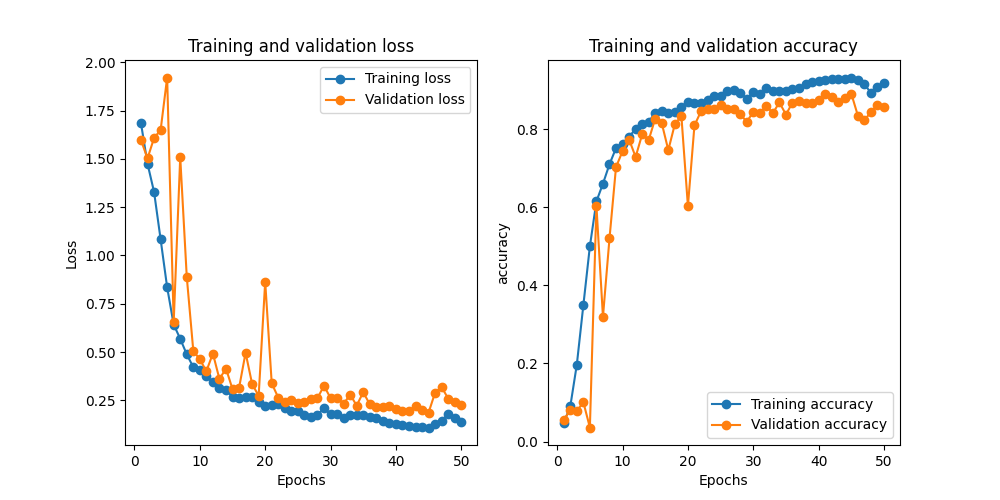

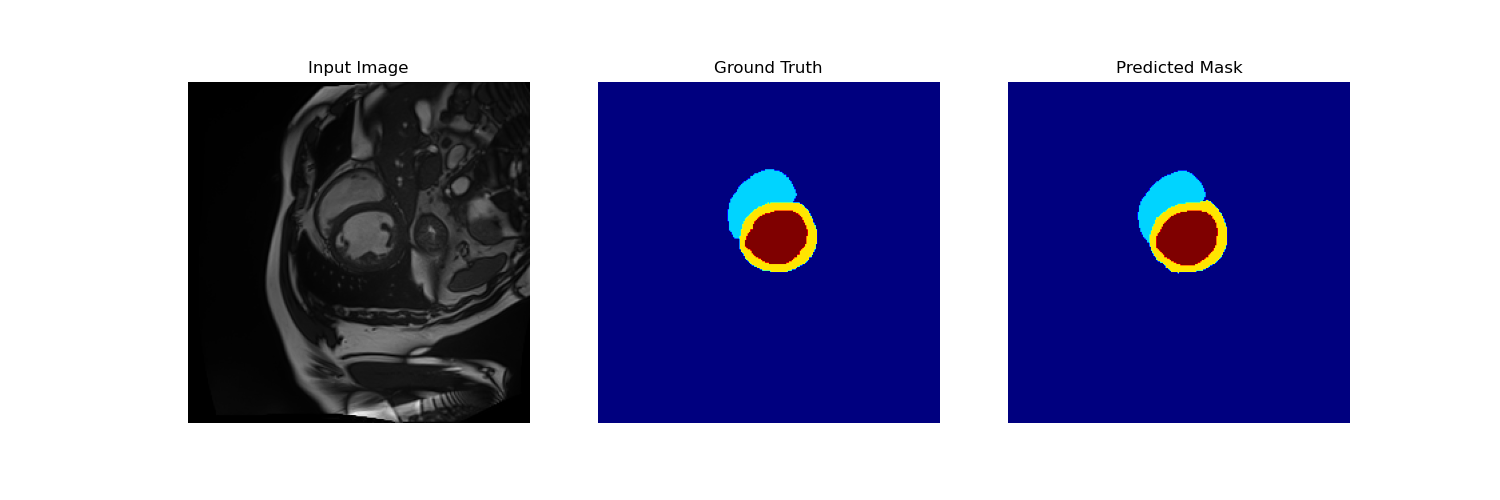

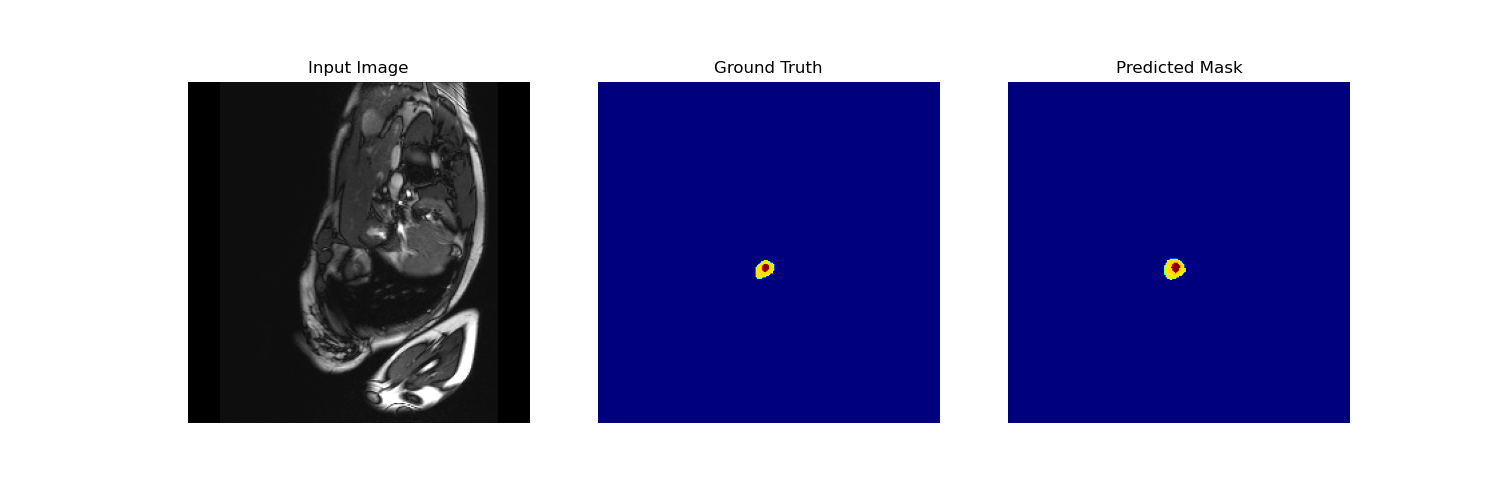

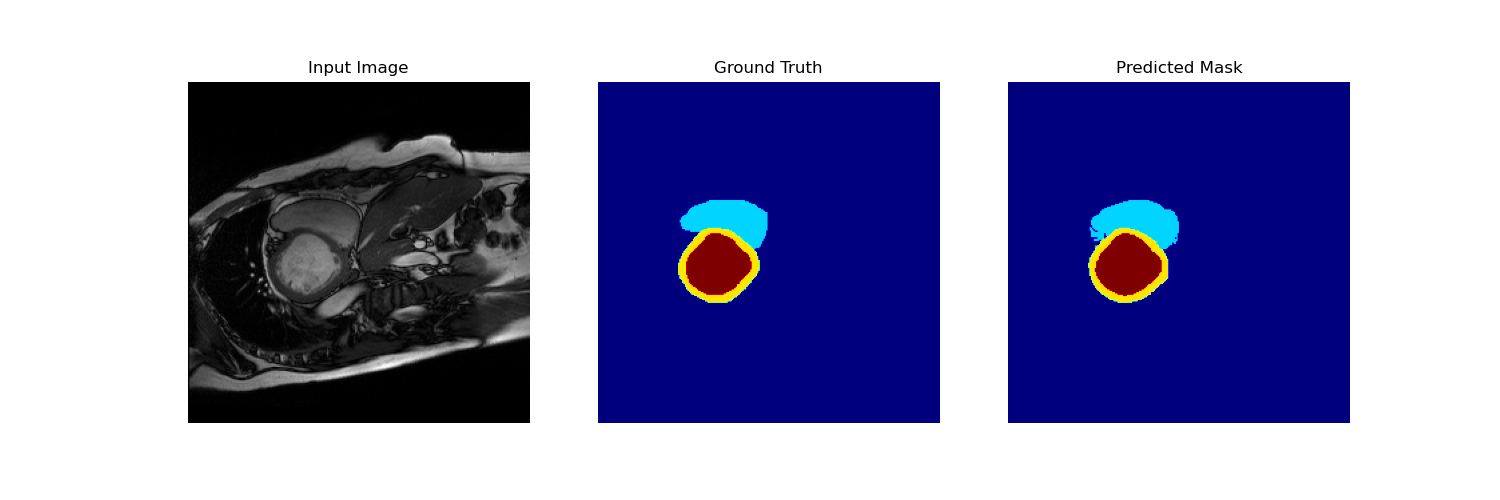

In [6]:
from IPython.display import Image, display

listOfImageNames = ['fig1.png', 'fig2.png', 'fig3.png', 'fig4.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))